In [1]:
from bs4 import BeautifulSoup
import requests
import random 
import pandas as pd
import regex as re

base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 21
page_size = 100

# Initialize lists to store reviews and extracted quoted text
reviews = []
quoted_text = []

for i in range(1, pages + 1):
    print(f"Scraping page {i}")
    
    # Construct the URL
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    
    # Get page content
    response = requests.get(url)
    content = response.content
    
    # Parse the HTML
    parsed_content = BeautifulSoup(content, 'html.parser')
    
    # Find all review blocks
    for para in parsed_content.find_all("div", class_="text_content"):
        reviews.append(para)
        

    print(f"{len(reviews)} total reviews")


Scraping page 1
100 total reviews
Scraping page 2
200 total reviews
Scraping page 3
300 total reviews
Scraping page 4
400 total reviews
Scraping page 5
500 total reviews
Scraping page 6
600 total reviews
Scraping page 7
700 total reviews
Scraping page 8
800 total reviews
Scraping page 9
900 total reviews
Scraping page 10
1000 total reviews
Scraping page 11
1100 total reviews
Scraping page 12
1200 total reviews
Scraping page 13
1300 total reviews
Scraping page 14
1400 total reviews
Scraping page 15
1500 total reviews
Scraping page 16
1600 total reviews
Scraping page 17
1700 total reviews
Scraping page 18
1800 total reviews
Scraping page 19
1900 total reviews
Scraping page 20
2000 total reviews
Scraping page 21
2100 total reviews


In [22]:
import re

R = []
for i in reviews:
    # Convert the review to a string
    i_str = str(i)
    # Compile the regex pattern
    pattern = re.compile(r'.*\|')
    # Substitute the pattern with an empty string
    result = re.sub(pattern, '', i_str)
    # Append the cleaned review to the list R
    R.append(result)

# Print the cleaned reviews



In [3]:
import pandas as pd

# Create a DataFrame from the reviews list
df = pd.DataFrame()
df["reviews"] = R

# Display the DataFrame
df


,reviews
0,I'm so fraustrated. My flight was cancelled...
1,We have sat on this plane for an hour and for...
2,British Airways stranding my wife and I at H...
3,"Although like many these days, I avoid BA o..."
4,This flight was British Airways at its very b...
...,...
2095,Manchester to Las Vegas via Manchester. I we...
2096,Miami to London Business Class. Living in Lo...
2097,I've flown this route (Sydney to London) man...
2098,Paris CDG to Bangkok via London Heathrow in ...


In [4]:
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

df['clean_reviews']=df['reviews'].apply(clean)
df

,reviews,clean_reviews
0,I'm so fraustrated. My flight was cancelled...,I m so fraustrated My flight was cancelled la...
1,We have sat on this plane for an hour and for...,We have sat on this plane for an hour and for...
2,British Airways stranding my wife and I at H...,British Airways stranding my wife and I at He...
3,"Although like many these days, I avoid BA o...",Although like many these days I avoid BA on l...
4,This flight was British Airways at its very b...,This flight was British Airways at its very b...
...,...,...
2095,Manchester to Las Vegas via Manchester. I we...,Manchester to Las Vegas via Manchester I went...
2096,Miami to London Business Class. Living in Lo...,Miami to London Business Class Living in Lond...
2097,I've flown this route (Sydney to London) man...,I ve flown this route Sydney to London many t...
2098,Paris CDG to Bangkok via London Heathrow in ...,Paris CDG to Bangkok via London Heathrow in B...


In [5]:
import nltk

# Download the Punkt tokenizer models, which are required to divide a text into a list of sentences
nltk.download('punkt')

# Define a Punkt tokenizer, which is used to split a text into a list of words
from nltk.tokenize import word_tokenize

# Import the Part Of Speech (POS) tagging module from NLTK
from nltk import pos_tag

# Download the list of stopwords
nltk.download('stopwords')

# Import the list of stopwords
from nltk.corpus import stopwords

# Download the WordNet data, which is used for lexical database 
nltk.download('wordnet')

# Import the WordNet corpus
from nltk.corpus import wordnet


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\patil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\patil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\patil\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['clean_reviews'].apply(token_stop_pos)

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\patil\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\patil\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [7]:
df

,reviews,clean_reviews,POS tagged
0,I'm so fraustrated. My flight was cancelled...,I m so fraustrated My flight was cancelled la...,"[(fraustrated, a), (flight, n), (cancelled, v)..."
1,We have sat on this plane for an hour and for...,We have sat on this plane for an hour and for...,"[(sat, v), (plane, n), (hour, n), (forty, n), ..."
2,British Airways stranding my wife and I at H...,British Airways stranding my wife and I at He...,"[(British, a), (Airways, n), (stranding, v), (..."
3,"Although like many these days, I avoid BA o...",Although like many these days I avoid BA on l...,"[(Although, None), (like, None), (many, a), (d..."
4,This flight was British Airways at its very b...,This flight was British Airways at its very b...,"[(flight, n), (British, a), (Airways, n), (bes..."
...,...,...,...
2095,Manchester to Las Vegas via Manchester. I we...,Manchester to Las Vegas via Manchester I went...,"[(Manchester, n), (Las, n), (Vegas, n), (via, ..."
2096,Miami to London Business Class. Living in Lo...,Miami to London Business Class Living in Lond...,"[(Miami, n), (London, n), (Business, n), (Clas..."
2097,I've flown this route (Sydney to London) man...,I ve flown this route Sydney to London many t...,"[(flown, r), (route, n), (Sydney, n), (London,..."
2098,Paris CDG to Bangkok via London Heathrow in ...,Paris CDG to Bangkok via London Heathrow in B...,"[(Paris, n), (CDG, n), (Bangkok, n), (via, Non..."


# Import NLTK libraries and download necessary datasets: The code begins by importing necessary libraries from the Natural Language Toolkit (NLTK) and downloading essential datasets for tokenization, part-of-speech tagging, stopwords, and lemmatization.


In [8]:
from nltk.stem import WordNetLemmatizer

# Create a lemmatizer object which will be used to get the base form (lemma) of words
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    lemma_rew = " "  # Initialize an empty string to store the lemmatized sentence
    for word, pos in pos_data:  # Iterate through each word and its POS tag in the input list
        if not pos:
            lemma = word  # If there's no POS tag, use the word as is
            lemma_rew = lemma_rew + " " + lemma  # Append the word to the lemmatized sentence
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)  # Lemmatize the word based on its POS tag
            lemma_rew = lemma_rew + " " + lemma  # Append the lemmatized word to the sentence
    return lemma_rew  # Return the lemmatized sentence

# Apply the lemmatize function to the 'POS tagged' column of the dataframe and store the result in a new column 'Lemma'
df['Lemma'] = df['POS tagged'].apply(lemmatize)
df

,reviews,clean_reviews,POS tagged,Lemma
0,I'm so fraustrated. My flight was cancelled...,I m so fraustrated My flight was cancelled la...,"[(fraustrated, a), (flight, n), (cancelled, v)...",fraustrated flight cancel last minute end wo...
1,We have sat on this plane for an hour and for...,We have sat on this plane for an hour and for...,"[(sat, v), (plane, n), (hour, n), (forty, n), ...",sit plane hour forty five minute await takeo...
2,British Airways stranding my wife and I at H...,British Airways stranding my wife and I at He...,"[(British, a), (Airways, n), (stranding, v), (...",British Airways strand wife Heathrow Airport...
3,"Although like many these days, I avoid BA o...",Although like many these days I avoid BA on l...,"[(Although, None), (like, None), (many, a), (d...",Although like many day avoid BA long haul Lo...
4,This flight was British Airways at its very b...,This flight was British Airways at its very b...,"[(flight, n), (British, a), (Airways, n), (bes...",flight British Airways best flight attendant...
...,...,...,...,...
2095,Manchester to Las Vegas via Manchester. I we...,Manchester to Las Vegas via Manchester I went...,"[(Manchester, n), (Las, n), (Vegas, n), (via, ...",Manchester Las Vegas via Manchester go troub...
2096,Miami to London Business Class. Living in Lo...,Miami to London Business Class Living in Lond...,"[(Miami, n), (London, n), (Business, n), (Clas...",Miami London Business Class Living London fl...
2097,I've flown this route (Sydney to London) man...,I ve flown this route Sydney to London many t...,"[(flown, r), (route, n), (Sydney, n), (London,...",flown route Sydney London many time airline ...
2098,Paris CDG to Bangkok via London Heathrow in ...,Paris CDG to Bangkok via London Heathrow in B...,"[(Paris, n), (CDG, n), (Bangkok, n), (via, Non...",Paris CDG Bangkok via London Heathrow Busine...


# A function named lemmatize is defined to process words and their corresponding part-of-speech (POS) tags. It uses the WordNetLemmatizer to convert words to their base forms and handles cases where POS tags are missing.

In [14]:
df[['reviews','Lemma']]

,reviews,Lemma
0,I'm so fraustrated. My flight was cancelled...,fraustrated flight cancel last minute end wo...
1,We have sat on this plane for an hour and for...,sit plane hour forty five minute await takeo...
2,British Airways stranding my wife and I at H...,British Airways strand wife Heathrow Airport...
3,"Although like many these days, I avoid BA o...",Although like many day avoid BA long haul Lo...
4,This flight was British Airways at its very b...,flight British Airways best flight attendant...
...,...,...
2095,Manchester to Las Vegas via Manchester. I we...,Manchester Las Vegas via Manchester go troub...
2096,Miami to London Business Class. Living in Lo...,Miami London Business Class Living London fl...
2097,I've flown this route (Sydney to London) man...,flown route Sydney London many time airline ...
2098,Paris CDG to Bangkok via London Heathrow in ...,Paris CDG Bangkok via London Heathrow Busine...


# Perform sentiment analysis using VADER: The SentimentIntensityAnalyzer from the VADER library is used to analyze the sentiment of the text in the 'Lemma' column. A function vadersentimentanalysis is defined to calculate the compound sentiment scores, which are then stored in a new column 'Sentiment'.



In [9]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Create a SentimentIntensityAnalyzer object to perform sentiment analysis
analyzer = SentimentIntensityAnalyzer()

# Function to calculate VADER sentiment scores
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)  # Get the sentiment polarity scores for the review
    return vs['compound']  # Return the compound score which summarizes the overall sentiment

# Apply the vadersentimentanalysis function to the 'Lemma' column and create a new column 'Sentiment' with the results
df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# Function to analyze the compound sentiment score
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'  # Return 'Positive' if the compound score is greater than or equal to 0.5
    elif compound < 0:
        return 'Negative'  # Return 'Negative' if the compound score is less than 0
    else:
        return 'Neutral'  # Return 'Neutral' if the compound score is between 0 and 0.5

# Apply the vader_analysis function to the 'Sentiment' column and create a new column 'Analysis' with the results
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df

,reviews,clean_reviews,POS tagged,Lemma,Sentiment,Analysis
0,I'm so fraustrated. My flight was cancelled...,I m so fraustrated My flight was cancelled la...,"[(fraustrated, a), (flight, n), (cancelled, v)...",fraustrated flight cancel last minute end wo...,-0.8729,Negative
1,We have sat on this plane for an hour and for...,We have sat on this plane for an hour and for...,"[(sat, v), (plane, n), (hour, n), (forty, n), ...",sit plane hour forty five minute await takeo...,0.1779,Neutral
2,British Airways stranding my wife and I at H...,British Airways stranding my wife and I at He...,"[(British, a), (Airways, n), (stranding, v), (...",British Airways strand wife Heathrow Airport...,-0.5719,Negative
3,"Although like many these days, I avoid BA o...",Although like many these days I avoid BA on l...,"[(Although, None), (like, None), (many, a), (d...",Although like many day avoid BA long haul Lo...,-0.7584,Negative
4,This flight was British Airways at its very b...,This flight was British Airways at its very b...,"[(flight, n), (British, a), (Airways, n), (bes...",flight British Airways best flight attendant...,0.9814,Positive
...,...,...,...,...,...,...
2095,Manchester to Las Vegas via Manchester. I we...,Manchester to Las Vegas via Manchester I went...,"[(Manchester, n), (Las, n), (Vegas, n), (via, ...",Manchester Las Vegas via Manchester go troub...,-0.9274,Negative
2096,Miami to London Business Class. Living in Lo...,Miami to London Business Class Living in Lond...,"[(Miami, n), (London, n), (Business, n), (Clas...",Miami London Business Class Living London fl...,0.9493,Positive
2097,I've flown this route (Sydney to London) man...,I ve flown this route Sydney to London many t...,"[(flown, r), (route, n), (Sydney, n), (London,...",flown route Sydney London many time airline ...,-0.8704,Negative
2098,Paris CDG to Bangkok via London Heathrow in ...,Paris CDG to Bangkok via London Heathrow in B...,"[(Paris, n), (CDG, n), (Bangkok, n), (via, Non...",Paris CDG Bangkok via London Heathrow Busine...,-0.6249,Negative


# Another function vader_analysis is defined to classify the compound sentiment scores as 'Positive', 'Negative', or 'Neutral' based on their values. This function is applied to the 'Sentiment' column, resulting in a new column 'Analysis'.

In [18]:
# Get the counts of each unique value in the 'Analysis' column
vader_counts = df['Analysis'].value_counts()
# Display the counts
vader_counts

Analysis
Positive    1045
Negative     812
Neutral      243
Name: count, dtype: int64

# Finally, matplotlib is used to create a pie chart displaying the distribution of sentiment classifications. The chart includes labels, percentages, and a slightly separated slice for the 'Neutral' category.

([<matplotlib.patches.Wedge at 0x1d825107950>,
 [Text(0.008227955036369873, 1.099969227185888, 'Positive'),
  Text(-0.39880977896215924, -1.025158895100732, 'Negative'),
  Text(1.2617753760420143, -0.4800238540052291, 'Neutral')],
 [Text(0.004487975474383566, 0.5999832148286661, '49.8%'),
  Text(-0.2175326067066323, -0.5591775791458538, '38.7%'),
  Text(0.7944511626931201, -0.3022372414106998, '11.6%')])

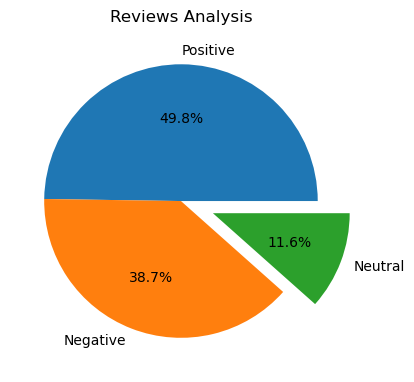

In [21]:
import matplotlib.pyplot as plt

# Ensure that plots are shown inline within notebooks
%matplotlib inline

# Create a new figure with a specified size
plt.figure(figsize=(15,7))

# Add a subplot with 1 row and 3 columns, and this is the 2nd subplot
plt.subplot(1,3,2)

# Set the title of the plot
plt.title("Reviews Analysis")

# Create a pie chart with the values and labels from vader_counts
# The explode parameter will separate the third slice from the pie
# The autopct parameter will format the percentages displayed on the pie chart
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%')


# Wordcloud
Word Cloud or Tag Clouds is a visualization technique for texts that are natively used for visualizing the tags or keywords from the websites

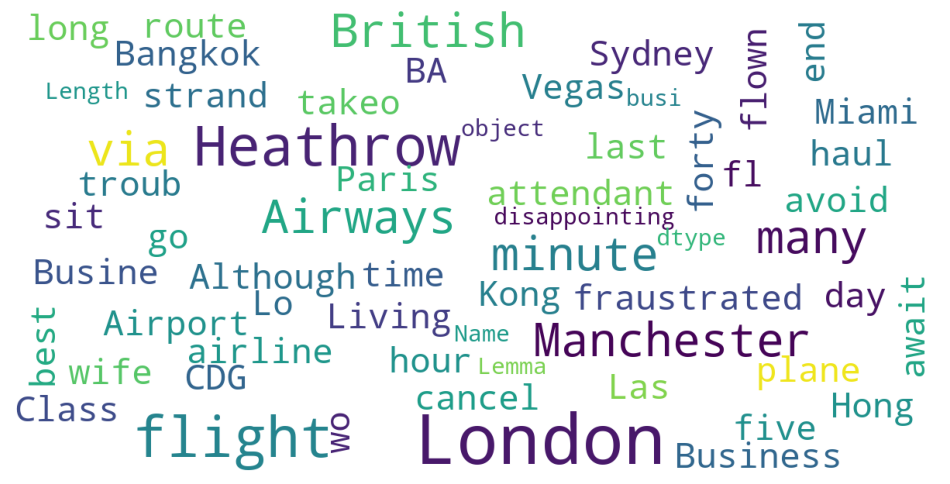

In [19]:

from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)

In [20]:
df.to_csv("British Airways_reviews.csv")